In [1]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


# Novi podaci 

In [2]:
graz_data = pd.read_csv(r'../data/data_train_reg.csv',index_col=0)

In [3]:
temporal = ['year', 'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday', 'holiday_school']

In [4]:
def parameter(pollutant, algo,new_dict):
    # extracting best parameters for every model
    value_1 = new_dict[pollutant]
    value_2 = value_1[algo]
    value_3 = value_2['best_params']
    return value_3

In [5]:
def prep_data(var_name, site_name, PM, rest_data):
    temp_y = PM[var_name]
    temp_y.name = var_name
    temp_temporal = rest_data[temporal]
    temp_x = rest_data.filter(like=site_name, axis=1)
    temp_x = pd.concat([temp_x, temp_temporal], axis=1)
    return temp_x, temp_y


In [6]:
def features_for_models(pollutant,algo,new_dict):
    # extracting best features for every model
    value_1 = new_dict[pollutant]
    value_2 = value_1[algo]
    value_3 = value_2['feature']
    return value_3

In [7]:
def ret_params(best_params,rg,random_temp):
    # uses best parameters for every model
    if rg == 'rf':
        p = {'n_estimators': int(best_params['n_estimators']),
             'max_depth': int(best_params['max_depth']),
             'n_jobs': int(best_params['n_jobs']),
             'random_state': random_temp,
             'max_samples': float(best_params['max_samples']),
             'min_samples_leaf': int(best_params['min_samples_leaf'])
             }
        return p
    else:
        if type(best_params['hidden_layer_sizes']) == int:
            p = {'hidden_layer_sizes': int(best_params['hidden_layer_sizes']),
                 'learning_rate_init': float(best_params['learning_rate_init']),
                 'solver':str(best_params['solver']),
                 'max_iter': int(best_params['max_iter']),
                 'early_stopping': bool(best_params['early_stopping']),
                 'random_state': random_temp,
                 'alpha': float(best_params['alpha']),

                 }
            return p
        else:
            p = {'hidden_layer_sizes': list(tuple(best_params['hidden_layer_sizes'])),
                'learning_rate_init': float(best_params['learning_rate_init']),
                'solver': str(best_params['solver']),
                 'max_iter': int(best_params['max_iter']),
                'early_stopping': bool(best_params['early_stopping']),
                 'random_state': random_temp,
               'alpha': float(best_params['alpha']),
                 }
            return p

In [21]:
def split_data_shuffle(x_data,y_data):
    train_x = x_data['2018-01-01':'2020-01-02']
    test_x = x_data['2020-01-03':'2020-03-15']
    train_y = y_data['2018-01-01':'2020-01-02']
    test_y = y_data['2020-01-03':'2020-03-15']
    train_x_shu = shuffle(train_x)
    test_x_shu = shuffle(test_x)
    train_y_shu = shuffle(train_y)
    test_y_shu = shuffle(test_y)
    return train_x_shu, test_x_shu, train_y_shu, test_y_shu

In [8]:
def split_data(x_data, y_data):
    
    train_x = x_data['2018-01-01':'2020-01-02']
    test_x = x_data['2020-01-03':'2020-03-15']
    train_y = y_data['2018-01-01':'2020-01-02']
    test_y = y_data['2020-01-03':'2020-03-15']
    return train_x, test_x, train_y, test_y
    

In [9]:
def split_data_nn_of_rf(X_train_temp, X_test_temp, key):
    if key == 'nn':
        sc = StandardScaler()
        X_train_temp_scaled = sc.fit_transform(X_train_temp)
        X_train_df = pd.DataFrame(X_train_temp_scaled, columns=X_train_temp.columns)
        X_test_temp_scaled = sc.transform(X_test_temp)
        X_test_df = pd.DataFrame(X_test_temp_scaled, columns=X_test_temp.columns)
        return X_train_df, X_test_df
    else:
        return X_train_temp,X_test_temp

In [10]:
pollutants = ['D_PM10K_mean','N_PM10K_mean','O_PM10K_mean','S_PM10K_mean', 'W_PM10K_mean']

In [11]:
PM = graz_data[pollutants]
rest_data = graz_data.drop(columns=pollutants,axis=1)

In [12]:
sites = ['DonBosco','Nord','Ost','Sud','West']

In [13]:
models = {'nn':MLPRegressor,
          'rf':RandomForestRegressor}

In [14]:
def clip_series(s, lower, upper):
    clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper))
    return clipped

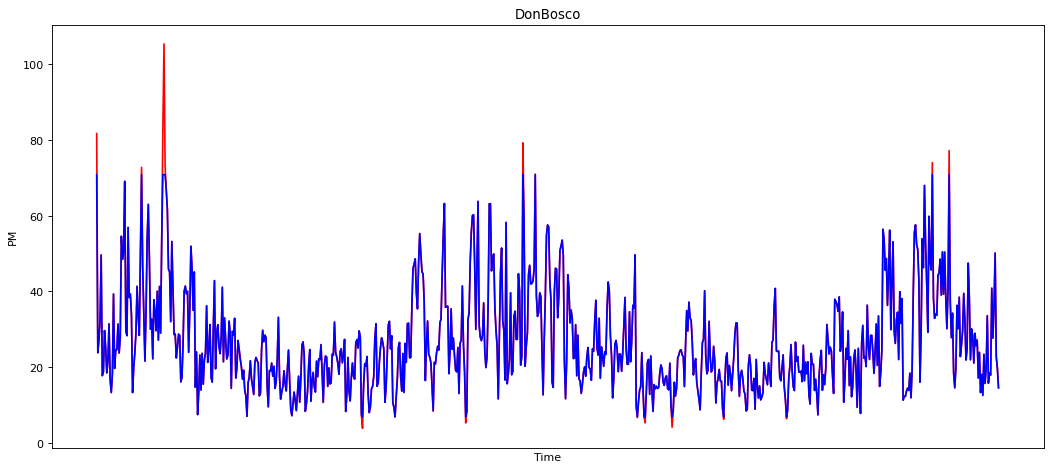

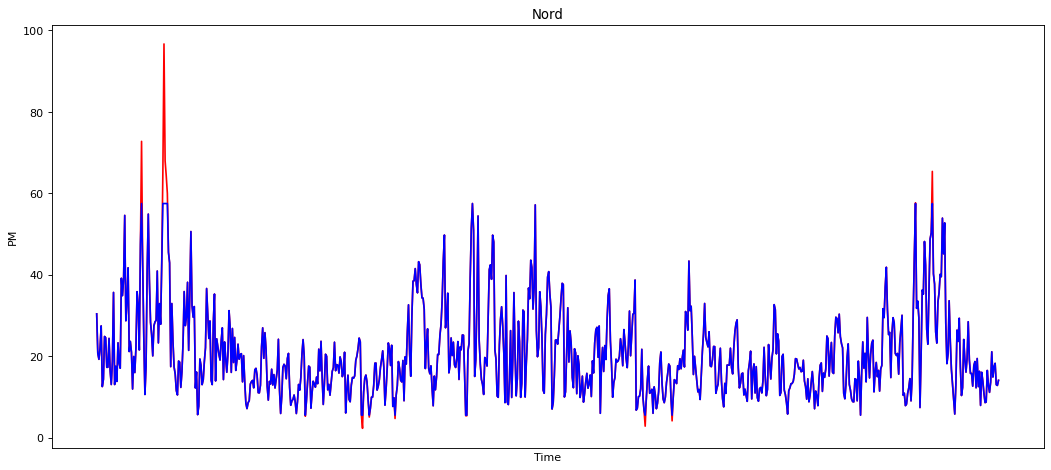

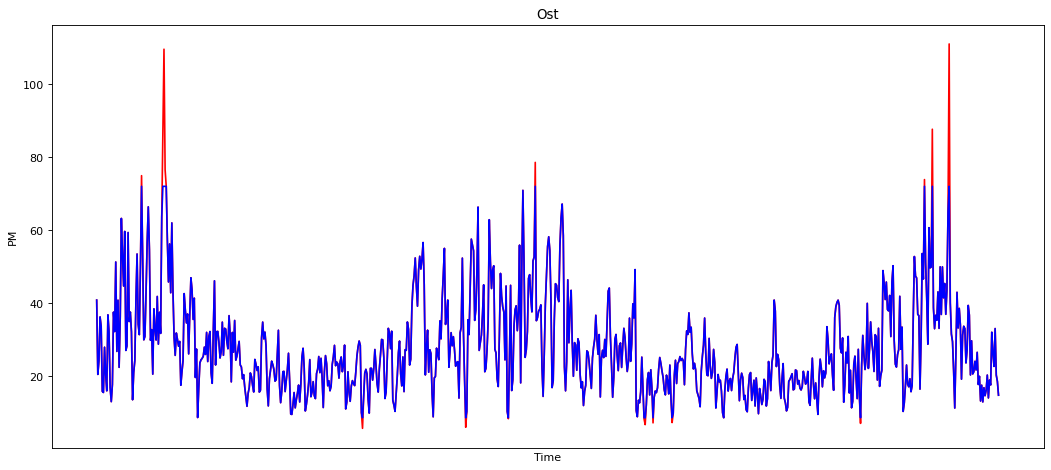

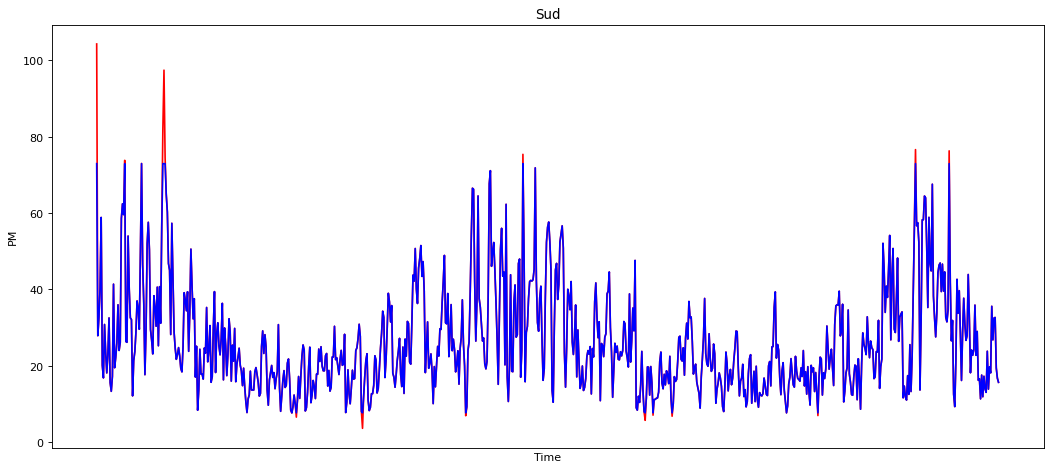

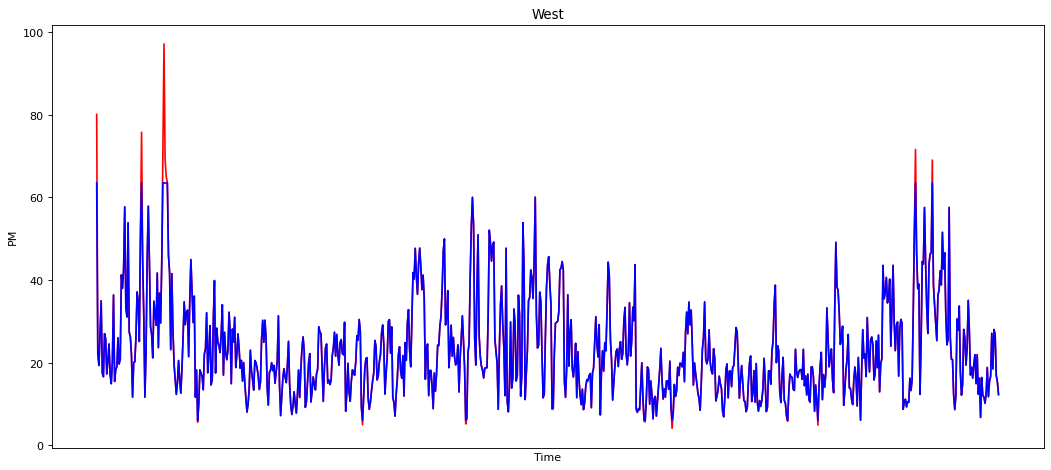

In [17]:
for varname,site in zip(pollutants,sites): 
    X,Y = prep_data(varname,site,PM,rest_data)
    Y_c = clip_series(Y,.01,.99)
    figure(figsize=(16, 7), dpi=80)
    plt.plot(Y,color = 'red')
    plt.legend
    plt.plot(Y_c,color='blue')
    plt.title(site)
    plt.xlabel('Time')
    plt.xticks(rotation = 90)
    plt.ylabel('PM')
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    plt.show()

In [15]:
def clip_series_x(s,lower,upper):
    for col in s.columns:
        x = s[col]
        clipped = x.clip(lower=s.quantile(lower), upper=s.quantile(upper))
        s[col].replace(clipped,inplace=True)
    return s

In [16]:
file = ['local_parameters_D_PM10K_mean','local_parameters_N_PM10K_mean','local_parameters_O_PM10K_mean','local_parameters_S_PM10K_mean','local_parameters_W_PM10K_mean']

for i in file:
    infile = open(f'../results/hyper i feature/{i}.pickle','rb')
    new_dict = pickle.load(infile)

In [17]:
random_states = [1,2,3,4,5]

In [27]:
dictionary1 = {}
dictionary2 = {}
for varname,site in zip(pollutants,sites):
    print(f'Start {varname}')
    dictionary_r2 = {}
    dictionary_rmse = {}
    for algoritam  in models.keys():
        print(f'Start {algoritam}')
        new_dict_r2 = {}
        new_dict_rmse = {}
        for random in random_states:
            print(f'Start random state {random}')
            # function for getting best parameters
            model_params = parameter(varname,algoritam,new_dict)
            # function for best features
            features = features_for_models(varname,algoritam,new_dict)
            # prepairing temporal and local data
            X, Y = prep_data_fe(varname, site, PM, rest_data)
            # split on traing and test
            Y = clip_series(Y,.01,.99)
            X_train, X_test, Y_train, Y_test = split_data(X, Y)
            X_train,X_test = split_data_nn_of_rf(X_train,X_test,algoritam)
            # fitting parameters
            clean_params = ret_params(model_params, algoritam,random)
            # fitting model with parameters
            model = models[algoritam](**clean_params)
            # fitting model with data
            model.fit(X_train, Y_train)
            # predictions
            predictions = model.predict(X_test)
            r2 = r2_score(Y_test,predictions)
            rmse = mean_squared_error(Y_test,predictions,squared=False)
            new_dict_r2.update({random: r2})
            new_dict_rmse.update({random:rmse})
        dictionary_r2.update({algoritam:new_dict_r2})
        dictionary_rmse.update({algoritam:new_dict_rmse})
    dictionary1.update ({site:dictionary_r2}) 
    dictionary2.update({site:dictionary_rmse})
    

Start D_PM10K_mean
Start nn
Start random state 1


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 2


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 3


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 4


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 5


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start rf
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start N_PM10K_mean
Start nn
Start random state 1


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 2


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 3


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 4


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Start random state 5


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start rf
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start O_PM10K_mean
Start nn
Start random state 1


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 2


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 3


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Start random state 4


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 5


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start rf
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start S_PM10K_mean
Start nn
Start random state 1


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 2


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 3


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 4


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 5


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start rf
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start W_PM10K_mean
Start nn
Start random state 1


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 2


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 3


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Start random state 4


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start random state 5


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\vpetric\Anaconda

Start rf
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5


In [26]:
dictionary2

{'DonBosco': {'nn': {1: 16.033897841392864,
   2: 15.290981393541427,
   3: 15.689396543253888,
   4: 14.854540735621082,
   5: 14.086126277391024},
  'rf': {1: 15.068279519473235,
   2: 16.400037365383962,
   3: 14.791753166880406,
   4: 16.22030103095812,
   5: 16.927776665407748}},
 'Nord': {'nn': {1: 13.79398547557229,
   2: 13.329493318406628,
   3: 13.05834779964683,
   4: 14.397456361878175,
   5: 13.210541517787028},
  'rf': {1: 13.516474676565956,
   2: 13.01018882358796,
   3: 13.264759487214278,
   4: 13.446239384521853,
   5: 13.283499346922227}},
 'Ost': {'nn': {1: 18.310926201882104,
   2: 16.580689137427402,
   3: 14.975618276771941,
   4: 16.766656014459798,
   5: 15.362863273765758},
  'rf': {1: 17.047860553266176,
   2: 15.410400362953126,
   3: 16.099472091307696,
   4: 15.365860668434197,
   5: 15.213745267929392}},
 'Sud': {'nn': {1: 17.394543619913076,
   2: 17.698913681326033,
   3: 17.292959704880563,
   4: 17.733096611025637,
   5: 16.948534805022632},
  'rf': 

In [31]:
pd.set_option('display.max_rows', None)

In [35]:
Y_train

index
2018-01-01    63.464833
2018-01-02    22.204167
2018-01-03    19.308333
2018-01-04    27.208333
2018-01-05    34.950000
2018-01-06    17.462500
2018-01-07    16.579167
2018-01-08    27.004167
2018-01-09    25.758333
2018-01-10    17.250000
2018-01-11    20.408333
2018-01-12    24.487500
2018-01-13    17.066667
2018-01-14    14.891667
2018-01-15    20.350000
2018-01-16    36.370833
2018-01-17    15.445833
2018-01-18    18.283333
2018-01-19    19.041667
2018-01-20    25.987500
2018-01-21    19.658333
2018-01-22    20.820833
2018-01-23    41.225000
2018-01-24    37.950000
2018-01-25    42.595833
2018-01-26    57.670833
2018-01-27    33.337500
2018-01-28    31.029167
2018-01-29    53.829167
2018-01-30    27.362500
2018-01-31    26.262500
2018-02-01    21.900000
2018-02-02    11.629167
2018-02-03    20.020833
2018-02-04    20.166667
2018-02-05    26.033333
2018-02-06    37.100000
2018-02-07    34.816667
2018-02-08    25.104167
2018-02-09    50.633333
2018-02-10    63.464833
2018-02-11

In [23]:
def prep_data_fe(var_name, site_name, PM, rest_data):
    if site == 'Nord':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        prep_mean = site + '_Precip_mean'
        radio_mean = site + '_Radiation_mean'
        temp_mean = site + '_Temp_mean'
        RH_mean = site+ '_RH_mean'
        windd_mean = site+ '_Winddirection_mean'
        winds_mean = site+ '_Winddirection_mean'
        press_mean = site +  '_Pressure_mean'
        peek_mean = site +'_peek_wind_speed_mean'
        temp_x['precip*radiation_mean']=temp_x[prep_mean]*temp_x[radio_mean]
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        temp_x['winds*windd_mean']=temp_x[windd_mean]*temp_x[winds_mean]
        temp_x['press*peek_mean']=temp_x[press_mean]*temp_x[peek_mean]
        return temp_x, temp_y
    elif site == 'DonBosco':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp_mean'
        RH_mean = site+ '_RH_mean'
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        return temp_x, temp_y
    elif site == 'West' or site == 'Sud':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp_mean'
        RH_mean = site+ '_RH_mean'
        windd_mean = site+ '_Winddirection_mean'
        winds_mean = site+ '_Winddirection_mean'
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        temp_x['winds*windd_mean']=temp_x[windd_mean]*temp_x[winds_mean]
        return temp_x, temp_y
    elif site == 'Ost': 
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp_mean'
        RH_mean = site+ '_RH_mean'
        windd_mean = site+ '_Winddirection_mean'
        winds_mean = site+ '_Winddirection_mean'
        press_mean = site +  '_Pressure_mean'
        peek_mean = site +'_peek_wind_speed_mean'
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        temp_x['winds*windd_mean']=temp_x[windd_mean]*temp_x[winds_mean]
        temp_x['press*peek_mean']=temp_x[press_mean]*temp_x[peek_mean]
        return temp_x, temp_y

# Stari podaci 

In [22]:
df = pd.read_csv(r'../data/new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv',index_col=0)

In [23]:
dropo2=df.filter(like='_NO2',axis=1)
dropo3=df.filter(like='_O3',axis=1)
dropox=df.filter(like='Ox',axis=1)

In [24]:
df_new = df.drop(columns=dropo2.columns,axis=1)

In [25]:
df_new = df_new.drop(columns=dropo3.columns,axis=1)

In [26]:
df_new = df_new.drop(columns=dropox.columns,axis=1)

In [27]:
df_new = df_new['2014-01-01':'2020-03-15']

In [28]:
df_new.isnull().sum()

D_PM10K                  0
N_PM10K                  0
O_PM10K                  0
S_PM10K                  0
W_PM10K                  0
year                     0
dayofyear                0
month_Apr                0
month_Aug                0
month_Dec                0
month_Feb                0
month_Jan                0
month_Jul                0
month_Jun                0
month_Mar                0
month_May                0
month_Nov                0
month_Oct                0
month_Sep                0
weekday_Friday           0
weekday_Monday           0
weekday_Saturday         0
weekday_Sunday           0
weekday_Thursday         0
weekday_Tuesday          0
weekday_Wednesday        0
season_fall              0
season_spring            0
season_summer            0
season_winter            0
holiday                  0
holiday_school           0
DonBosco_RH              0
DonBosco_Temp            0
Nord_Precip              0
Nord_Pressure            0
Nord_RH                  0
N

In [29]:
df_new['Ost_Pressure'].fillna(value=df_new['Ost_Pressure'].mean(), inplace=True)
df_new['Ost_RH'].fillna(value=df_new['Ost_RH'].mean(), inplace=True)
df_new['Ost_Temp'].fillna(value=df_new['Ost_Temp'].mean(), inplace=True)
df_new['Ost_Winddirection'].fillna(value=df_new['Ost_Winddirection'].mean(), inplace=True)
df_new['Ost_Windspeed'].fillna(value=df_new['Ost_Windspeed'].mean(), inplace=True)

In [30]:
df_new = df_new.fillna(df_new.mean)

In [31]:
pollutants = ['D_PM10K', 'N_PM10K', 'O_PM10K', 'S_PM10K', 'W_PM10K']

In [32]:
PM = df_new[pollutants]

In [33]:
rest_data = df_new.drop(columns = pollutants,axis=1)

In [34]:
pollutants_par = ['D_PM10K_mean','N_PM10K_mean','O_PM10K_mean','S_PM10K_mean', 'W_PM10K_mean']

In [35]:
def split_data_old(x_data, y_data):
    train_x = x_data['2014-01-01':'2020-01-02']
    test_x = x_data['2020-01-03':'2020-03-15']
    train_y = y_data['2014-01-01':'2020-01-02']
    test_y = y_data['2020-01-03':'2020-03-15']
    return train_x, test_x, train_y, test_y

In [36]:
def best_parames_bez_feature(train_features,train_labels):
    temp_dict = {}
    model = RandomForestRegressor()
    param_grid = {
            'n_estimators': [100, 200, 300],
             'max_depth': [4,6,8,10],
             'n_jobs': [-1],
            'random_state': [42],
             'max_samples' : [0.4,0.45,0.5],
             'min_samples_leaf': [2,5,10]
        }
    rf_random = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    rf_random.fit(train_features, train_labels)
    temp_dict.update({'best_params': rf_random.best_params_})
    return temp_dict

In [37]:
results_collector_dict = {}
for varname,site in zip(pollutants,sites):
    
    print(f'Start {varname} {site}')

    #selecting data for specific site
    X,Y = prep_data(varname,site,PM,rest_data)
    #spliting data into train and test
    X_train,X_test,Y_train,Y_test = split_data(X,Y)
    #best parameters for models
    values = best_parames_bez_feature(X_train,Y_train)
    results_collector_dict.update({varname:values})
    


Start D_PM10K DonBosco
Start N_PM10K Nord
Start O_PM10K Ost
Start S_PM10K Sud
Start W_PM10K West


In [38]:
def parameter_old(pollutant,new_dict):
    # extracting best parameters for every model
    value_1 = new_dict[pollutant]
    value_3 = value_1['best_params']
    return value_3

In [39]:
def ret_params_old(best_params,random_temp):
    # uses best parameters for every model
    p = {'n_estimators': int(best_params['n_estimators']),
             'max_depth': int(best_params['max_depth']),
             'n_jobs': int(best_params['n_jobs']),
             'random_state': random_temp,
             'max_samples': float(best_params['max_samples']),
             'min_samples_leaf': int(best_params['min_samples_leaf'])
             }
    return p

In [40]:
rest_data.columns

Index(['year', 'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday', 'holiday_school', 'DonBosco_RH', 'DonBosco_Temp',
       'Nord_Precip', 'Nord_Pressure', 'Nord_RH', 'Nord_Temp',
       'Nord_Winddirection', 'Nord_Windspeed', 'Sud_RH', 'Sud_Temp',
       'Sud_Winddirection', 'Sud_Windspeed', 'West_RH', 'West_Temp',
       'West_Winddirection', 'West_Windspeed', 'Ost_Pressure', 'Ost_RH',
       'Ost_Temp', 'Ost_Winddirection', 'Ost_Windspeed'],
      dtype='object')

In [46]:
def prep_data_old(var_name, site_name, PM, rest_data):
    if site == 'Nord':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        prep = site + '_Precip'
        temp = site + '_Temp'
        RH= site+ '_RH'
        windd = site+ '_Winddirection'
        winds = site+ '_Winddirection'
        press = site +  '_Pressure'
        temp_x['temp*rh']=temp_x[temp]*temp_x[RH]
        temp_x['winds*windd']=temp_x[windd]*temp_x[winds]
        temp_x['press*precip']=temp_x[press]*temp_x[prep]
        return temp_x, temp_y
    elif site == 'DonBosco':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp'
        RH_mean = site+ '_RH'
        temp_x['temp*rh']=temp_x[temp_mean]*temp_x[RH_mean]
        return temp_x, temp_y
    elif site == 'West' or site == 'Sud':
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp'
        RH_mean = site+ '_RH'
        windd_mean = site+ '_Winddirection'
        winds_mean = site+ '_Winddirection'
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        temp_x['winds*windd_mean']=temp_x[windd_mean]*temp_x[winds_mean]
        return temp_x, temp_y
    elif site == 'Ost': 
        temp_y = PM[var_name]
        temp_y.name = var_name
        temp_temporal = rest_data[temporal]
        temp_x = rest_data.filter(like=site_name, axis=1)
        temp_x = pd.concat([temp_x, temp_temporal], axis=1)
        temp_mean = site + '_Temp'
        RH_mean = site+ '_RH'
        windd_mean = site+ '_Winddirection'
        winds_mean = site+ '_Winddirection'
        temp_x['temp*rh_mean']=temp_x[temp_mean]*temp_x[RH_mean]
        temp_x['winds*windd_mean']=temp_x[windd_mean]*temp_x[winds_mean]
        return temp_x, temp_y

In [47]:
dictionary1 = {}
dictionary2 = {}
for varname,site,par in zip(pollutants,sites,pollutants_par):
    print(f'Start {varname}')
    dictionary_r2 = {}
    dictionary_rmse = {}
    for random in random_states:
        print(f'Start random state {random}')
        # function for getting best parameters
        model_params = parameter_old(varname,results_collector_dict)
        # prepairing temporal and local data
        X, Y = prep_data_old(varname, site, PM, rest_data)
            # split on traing and test
        Y = clip_series(Y,.01,.99)
        X_train, X_test, Y_train, Y_test = split_data_old(X, Y)
            # fitting parameters
        clean_params = ret_params_old(model_params,random)
            # fitting model with parameters
        model = models['rf'](**clean_params)
            # fitting model with data
        model.fit(X_train, Y_train)
            # predictions
        predictions = model.predict(X_test)
        r2 = r2_score(Y_test,predictions)
        rmse = mean_squared_error(Y_test,predictions,squared=False)
        dictionary_r2.update({random:r2})
        dictionary_rmse.update({random:rmse})
    dictionary1.update ({site:dictionary_r2}) 
    dictionary2.update({site:dictionary_rmse})

Start D_PM10K
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start N_PM10K
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start O_PM10K
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start S_PM10K
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5
Start W_PM10K
Start random state 1
Start random state 2
Start random state 3
Start random state 4
Start random state 5


In [48]:
dictionary1

{'DonBosco': {1: 0.2986762009413857,
  2: 0.2710522642838207,
  3: 0.313477795423204,
  4: 0.30772764716679835,
  5: 0.32411702705674195},
 'Nord': {1: 0.6655558011276667,
  2: 0.6620418198127341,
  3: 0.6809760874386377,
  4: 0.6761609225570678,
  5: 0.6627707241329024},
 'Ost': {1: 0.2820919037820857,
  2: 0.2883507823450516,
  3: 0.25115416403774526,
  4: 0.3089323786552264,
  5: 0.3206242750119913},
 'Sud': {1: 0.6417333394575968,
  2: 0.6522477836278783,
  3: 0.6418640931716065,
  4: 0.6518123456747666,
  5: 0.6396809195920539},
 'West': {1: 0.6388364537269604,
  2: 0.621235667792266,
  3: 0.6390798879364085,
  4: 0.6422451749927054,
  5: 0.6380191862268662}}